# Probabilidade e Estatística
### 🧌 Troll

Nós fomos encarregados de fazer uma simulação computacional do famoso problema Monty Hall. Primeiramente, entendamos como ele ocorre de forma fácil. Consideremos que o participante trocará a porta. Assim, temos duas possibilidades: ele acerta de primeira, ou erra de primeira. Se ele acertar, uma das portas erradas será aberta e o participante trocará para a errada, perdendo o jogo. Se ele errar, uma das portas erradas será aberta e o participante trocará para a certa. Dessa forma, a primeira escolha é que decide o resultado, com o caso dele errando fazendo ele ganhar o jogo, o que dá uma probabilidade de 2/3 de ganhar trocando.
Façamos nossa simulação para o problema Monty Hall com esse raciocínio em mente.

In [ ]:
#Importando bibliotecas
import random
import matplotlib.pyplot as plt

In [ ]:
#Resultado de um jogo
def game():
    if random.randint(1,3) != random.randint(1,3):
        return True
    else:
        return False

In [ ]:
#Fazer 100 jogos
def games_100():
    victory = 0
    for _ in range(100):
        if game():
            victory += 1
    return victory

In [28]:
#Façamos 10000 vezes 100 jogos
vitorias = []
for _ in range(10000):
    vitorias.append(games_100())

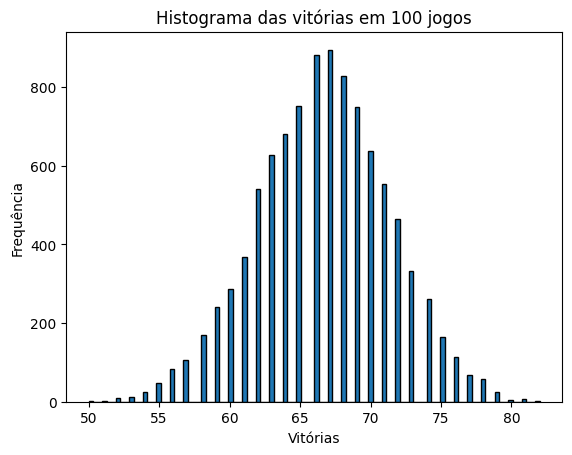

In [ ]:
#Plotamos o gráfico
plt.hist(vitorias, bins=100, edgecolor="black")
plt.xlabel("Vitórias")
plt.ylabel("Frequência")
plt.title("Histograma das vitórias em 100 jogos")
plt.show()

Veja que o número de vitórias possui distribuição normal em torno de 67, indicando que temos probabilidade de 2/3 de ganhar trocando de porta

Façamos agora a demonstração matemática para isso usando Bayes:

Seja o premio A, premio B e premio C o carro estar reespectivamente atrás das portas A, B e C. Além disso, seja abrir A, abrir B e abrir C o apresentador abrir essas portas reespectivamente após a escolha inicial. Sem perda de generalização, façamos que se escolheu abrir inicialmente a porta A. Assim, o apresentador não abrirá a A e não abrirá a que tem o prêmio:

$$
P(abrir A) = P(abrir B|premio B) = P(abrir C|Premio C) = 0 
$$

Agora, podemos dividir em dois casos, ou o prêmio está em A ou o prêmio não está em A. No primeiro caso, ele pode escolher qualquer porta entre B e C, $P(abrir B|premio A) + P(abrir C|premio A) = 1$. No segundo caso, teremos só uma opção: $P(abrir B|premio C) = P(abrir C|premio B) = 1$

Agora, façamos a probabilidade total de abrir B:

$$
P(abrir B) = P(abrir B|premio A) P(premio A) + 
P(abrir B|premio B)P(premio B) +
$$
$$
+ P(abrir B|premio C)P(premio C)
$$
$$
P(abrir B) = 1/2 * 1/3 + 0 * 1/3 + 1 * 1/3 = 1/2
$$

Aplicando Bayes:
$$
P(premio A|abrir B) = P(abrir B|premio A) \frac{P(premio A)}{abrir B}
$$

$$
P(premio A|abrir B) = 1/2 * \frac{1/3}{1/2} = 1/3
$$

Assim, se a probabilidade de o prêmio estar em A após o apresentador abrir a porta B é 1/3, a probabilidade de o prêmio estar em C após o apresentador abrir B, por ser complementar, é 2/3. 

Logo, assim como dito por Marilyn, a probabilidade de ganhar trocando de porta é 2/3. Esse é um resultado interessante por ser contra intuitivo, gerando discussões interessantes, como no artigo em referência, que o relaciona à entropia.

Referências:

SILVEIRA, M. P. V.; VELLOSO, M.; SANTOS, A. C. F. The Monty Hall Problem, Information and Entropy Simulation. Latin American Journal of Physics Education, v. 17, n. 1, p. 1308-1, mar. 2023.